# **Visualisasi Data Penjualan pada Aplikasi Power BI**
**Hashfi Putraza Hikmat**

* Pada kesempatan kali ini, saya akan membuat Dashboard di aplikasi Power BI menggunakan data yang ada di internet. 
* Power BI sendiri adalah aplikasi data analisis bisnis dan intelijen bisnis (BI) terpadu dari Microsoft yang memungkinkan pengguna untuk terhubung, memvisualisasikan, dan menganalisis data dari berbagai sumber. 
* Sebelum di gunakan, ada baiknya kita memeriksa terlebih dahulu. Oleh karenanya saya memeriksanya di Jupyter Notebook, untuk memeriksa apakah data ini sudah bersih atau belum.

## **1. Sumber Data**

- Pertama Data didownload dari Sini: https://docs.google.com/spreadsheets/d/1RlVvP3N9j4mvdTYtPLeuPzOpcpchNRfq/edit?usp=sharing&ouid=105030904066357342855&rtpof=true&sd=true
- Lalu di save sebagai CSV, dengan nama `sales_data.csv`

## **2. Import Data & Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
base_dir = "D:\PENTING\Purwadhika\Job Connector Data Science\Materials\Modul 2\Portofolio\\"
path = base_dir + "sales_data.csv"
df = pd.read_csv(path)

## **3. Mengecek Jumlah Data, Duplikasi & Missing Value**

In [9]:
display(df.head())
display(df.tail())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,INDMKB,8/11/2020,11/11/2020,sas,as,asa,asa,asas,asas,...,42420.0,INDMKB,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,asasa,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/6/2020,16/6/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2018-110422,21/1/2018,23/1/2018,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2021-121258,26/2/2021,3/3/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2021-121258,26/2/2021,3/3/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2021-121258,26/2/2021,3/3/2021,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2021-119914,4/5/2021,9/5/2021,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


Terdapat 9994 Baris dan 21 Kolom.

In [10]:
df.duplicated().sum()

np.int64(0)

Tidak ada duplikasi pada data.

In [11]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}') # Mengecek jumlah baris dan kolom

df.info() # Mengecek informasi data

Jumlah baris dan kolom di dataset df adalah (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 no

Terdapat 3 tipe data yakni integer yang totalnya ada 2 data, float yang totalnya ada 4 data, dan sisanya yang berbentuk float.

In [12]:
#Persentase missing value
df.isna().sum()/df.shape[0]*100

Row ID            0.000000
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Ship Mode         0.000000
Customer ID       0.000000
Customer Name     0.000000
Segment           0.000000
Country/Region    0.000000
City              0.000000
State             0.000000
Postal Code       0.110066
Region            0.000000
Product ID        0.000000
Category          0.000000
Sub-Category      0.000000
Product Name      0.000000
Sales             0.000000
Quantity          0.000000
Discount          0.000000
Profit            0.000000
dtype: float64

Missing value hanya ditemukan di Data `Postal Code` dan jumlahnya tidak signifikan hanya sekitar 0.11 persen saja, maka akan kita lakukan drop kolom.

## **4. Pembersihan Data Menggunakan Fitur Drop**

In [14]:
df = df.drop(columns=['Postal Code'])

Kolom yang memiliki null value pada Kolom `Postal Code` sudah di drop.

In [16]:
#Persentase missing value
df.isna().sum()/df.shape[0]*100

Row ID            0.0
Order ID          0.0
Order Date        0.0
Ship Date         0.0
Ship Mode         0.0
Customer ID       0.0
Customer Name     0.0
Segment           0.0
Country/Region    0.0
City              0.0
State             0.0
Region            0.0
Product ID        0.0
Category          0.0
Sub-Category      0.0
Product Name      0.0
Sales             0.0
Quantity          0.0
Discount          0.0
Profit            0.0
dtype: float64

Dilakukan pemeriksaan kembali, dan semua kolomnya sudah tidak memiliki missing value.

## **5. Menyimpan Data yang Sudah Bersih Dalam bentuk XLSX**

In [17]:
df.to_excel('sales_data_cleaned.xlsx', index=False)

Lalu data yang sudah bersih di simpan dalam bentuk excel dengan nama `sales_data_cleaned.xlsx`, data inilah yang nantinya akan diproses di Microsoft Power BI untuk dilakukan visualisasi.

## **6. Pengenalan Power BI**

- Microsoft Power BI adalah solusi pelaporan lengkap yang menyediakan persiapan data, visualisasi data, distribusi, dan pengelolaan melalui alat pengembangan dan platform online.

- Power BI dapat diskalakan dari laporan sederhana yang menggunakan satu sumber data hingga laporan yang memerlukan pemodelan data kompleks dan tema yang konsisten. Gunakan Power BI untuk membuat laporan visual yang menakjubkan dan interaktif sebagai mesin analitik dan pengambilan keputusan di balik proyek kelompok, divisi, atau seluruh organisasi.

- Power BI adalah alat yang esensial bagi analis data dan organisasinya; namun, semua profesional data akan mendapat manfaat dari pemahaman tentang cara kerja Power BI untuk mengeksplorasi dan menyajikan wawasan data di dalam organisasi.

Untuk lebih lengkapnya mengenai Power BI bisa dibaca disini:
https://learn.microsoft.com/en-us/training/modules/get-started-with-power-bi/?WT.mc_id=powerbi_home_inproduct_introcard

## **7. Unggah data `sales_data_cleaned.xlsx` di Power BI**

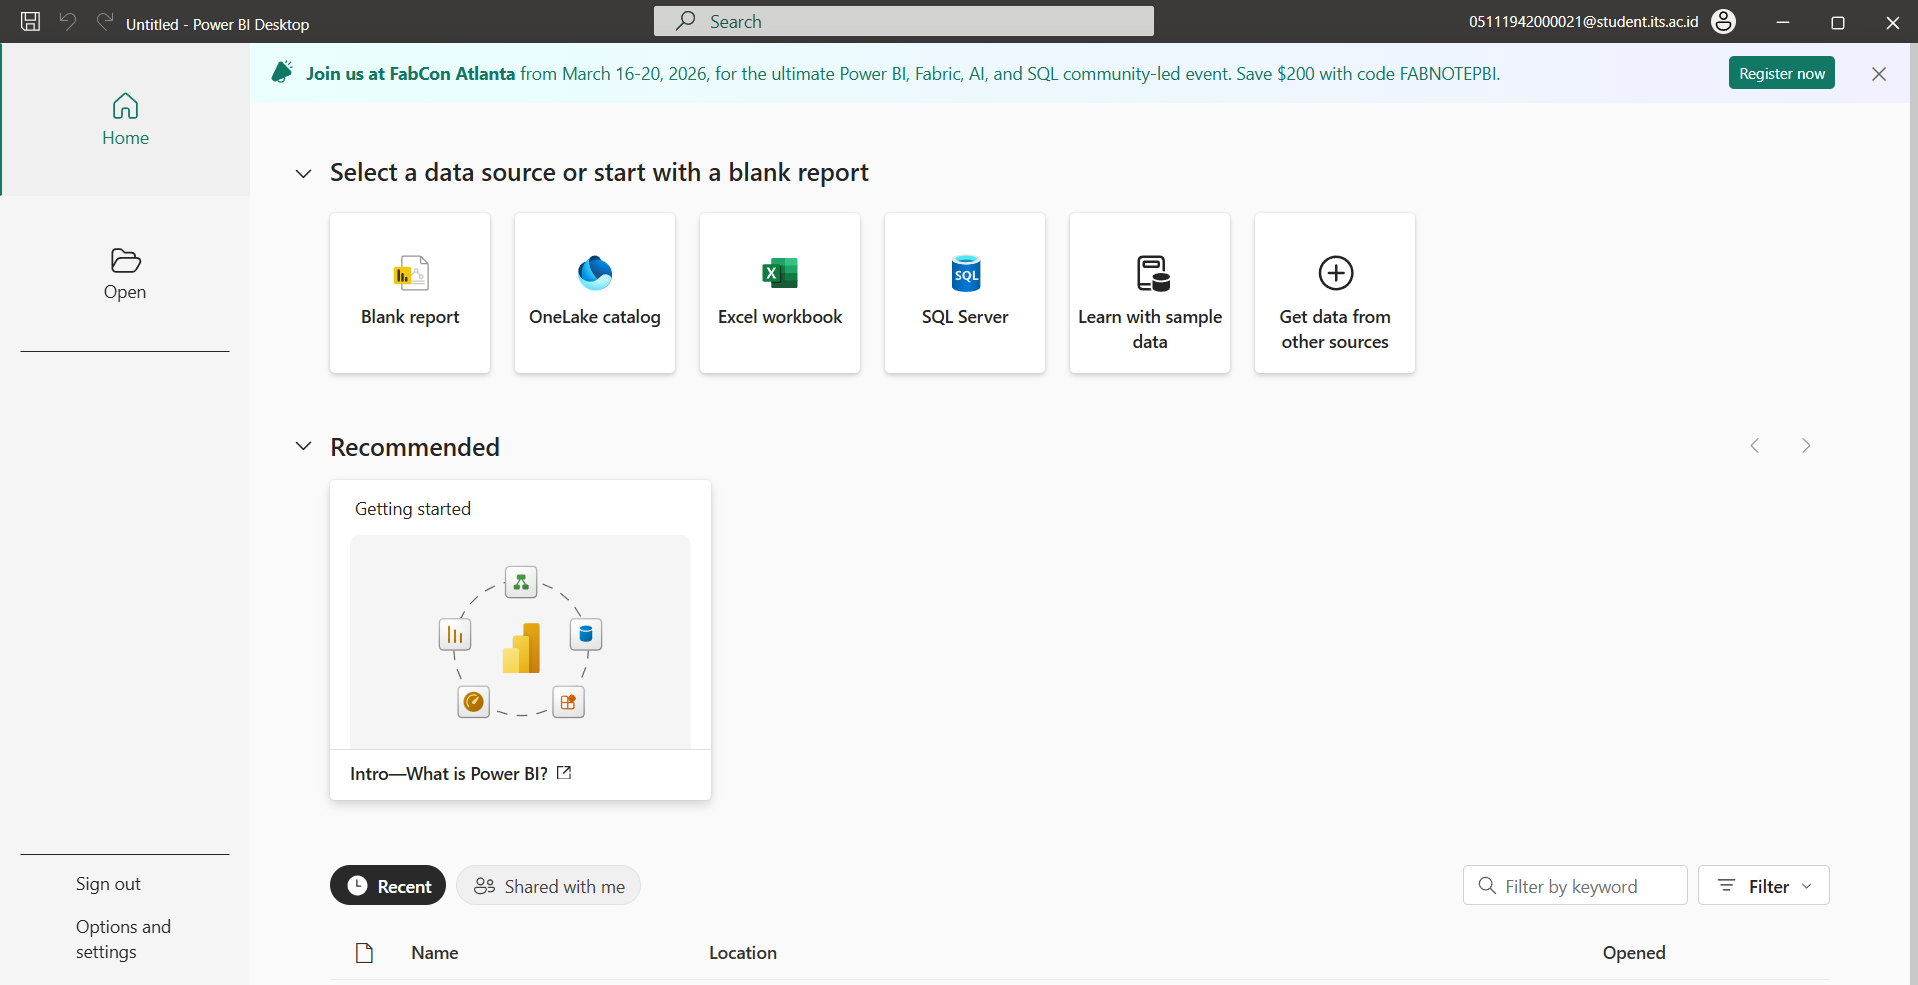

Tampilan awal Power BI adalah seperti ini. Lalu kita memilih yang excel workbook, hasilnya akan seperti ini:

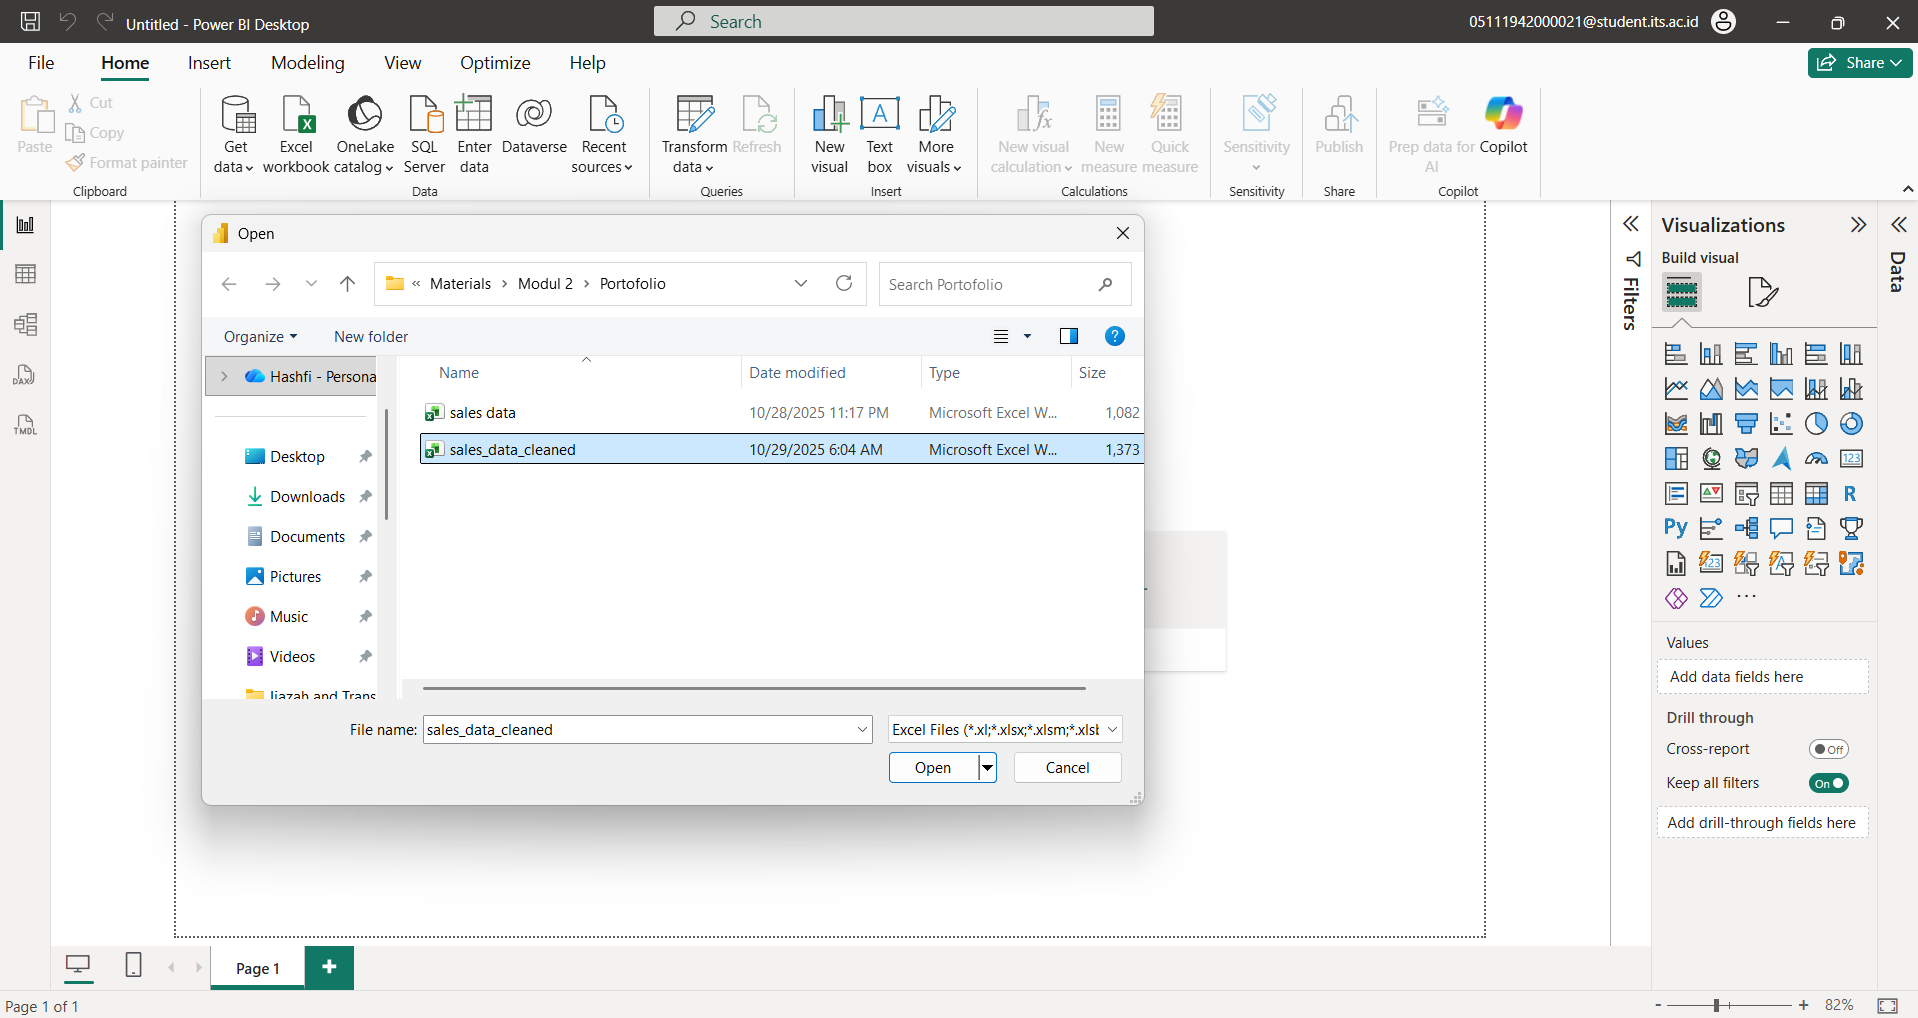

Lalu di pilih data yang akan dimuat

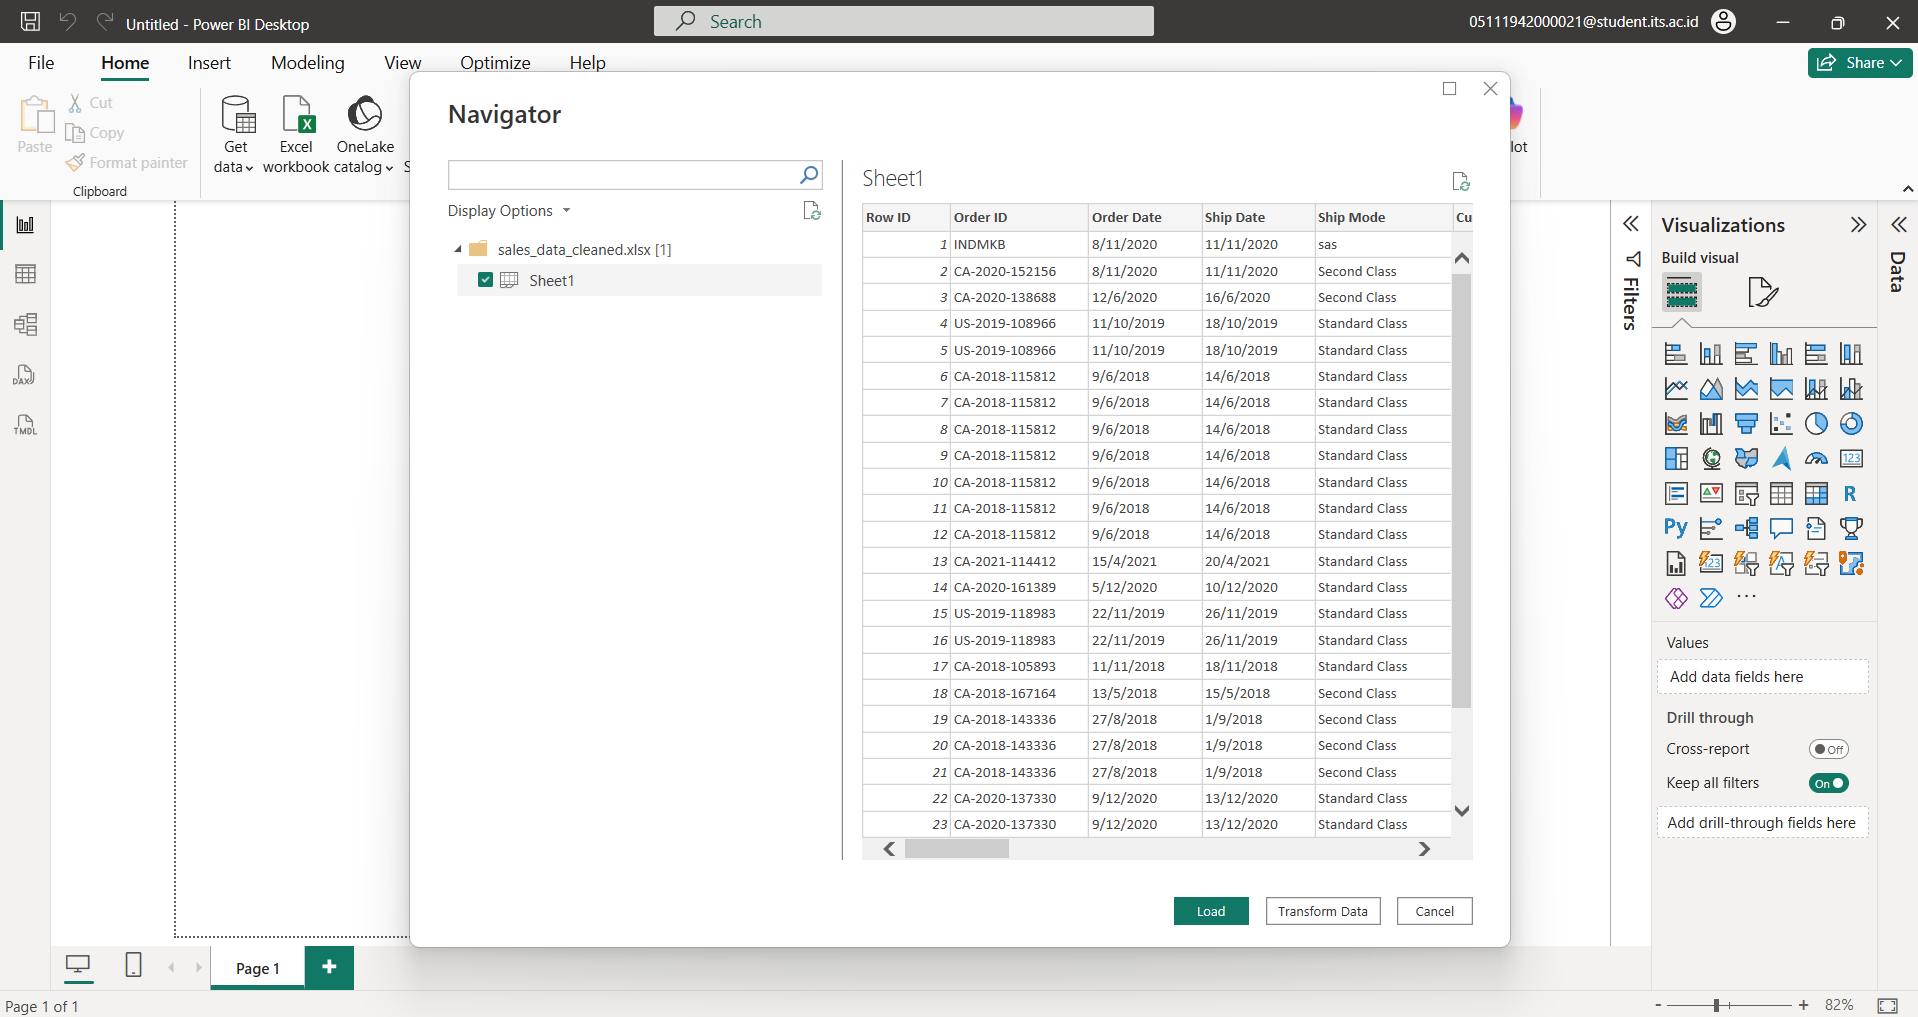

Terlihat bahwa data sudah berhasil diunggah.

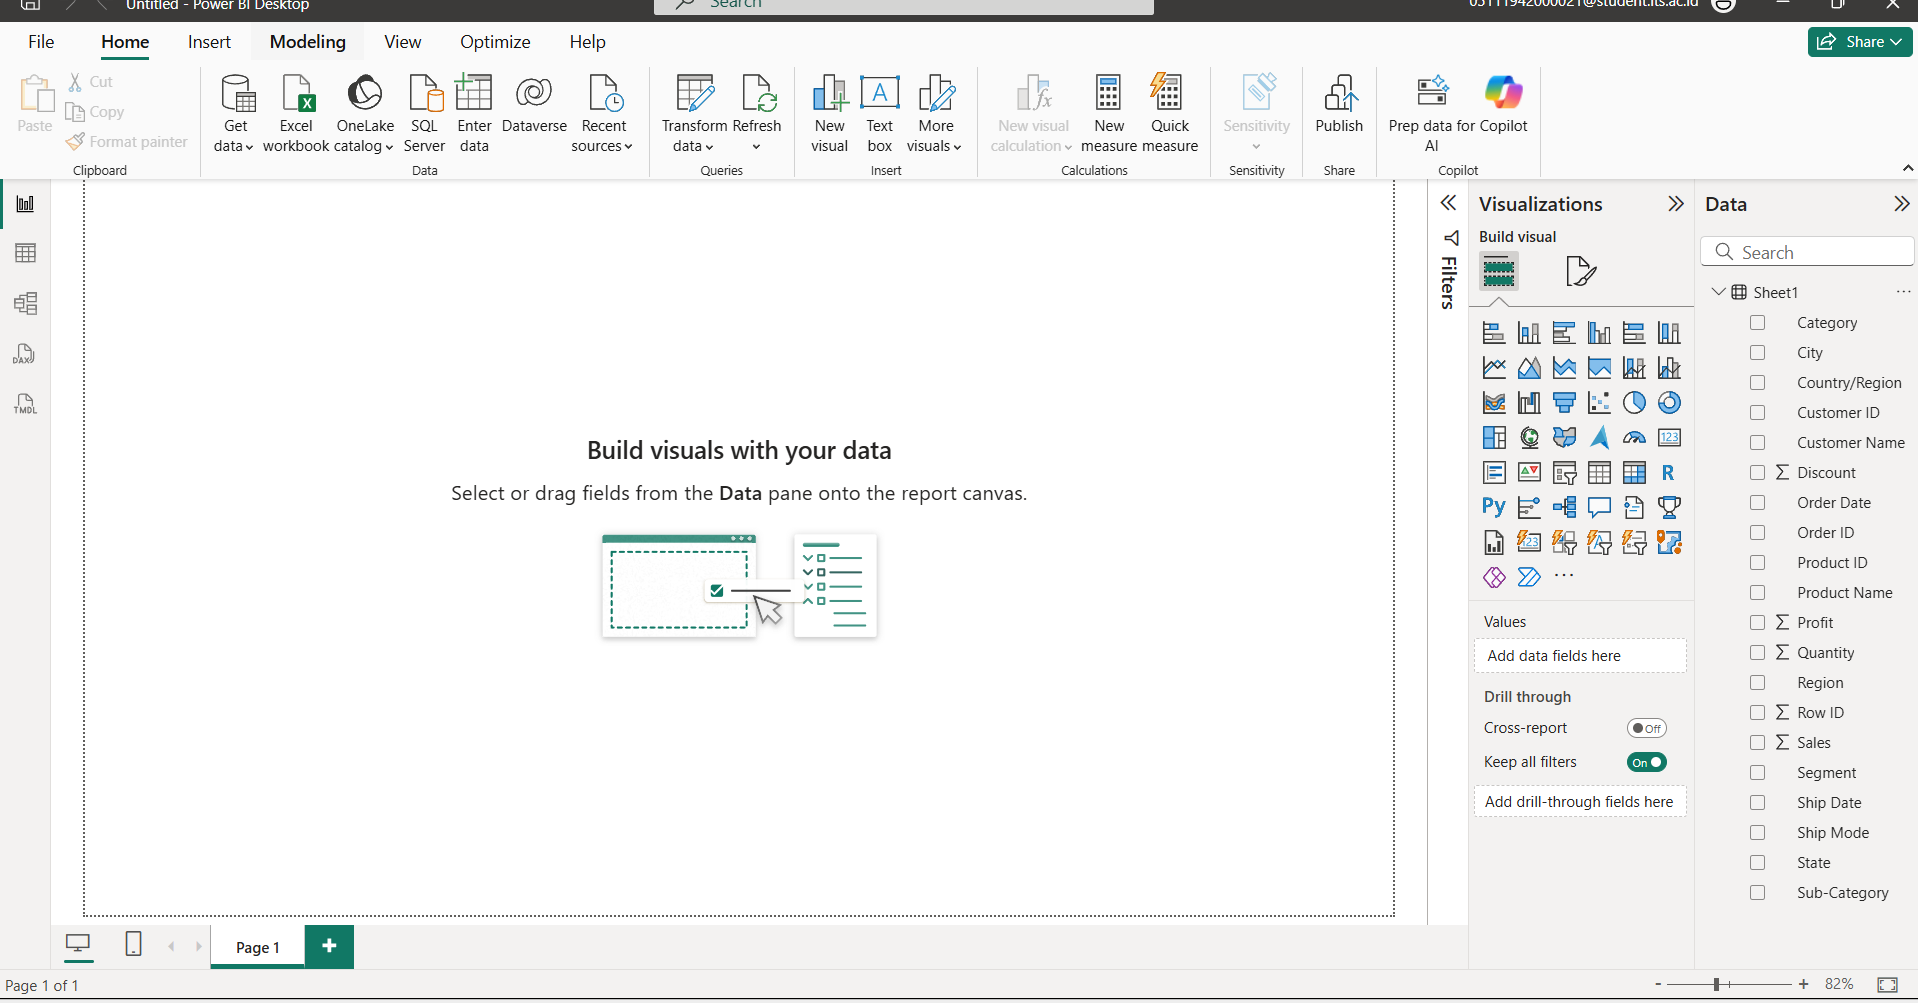

## **8. Membuat Visualisasi Data**

Power BI terkenal dengan pembuatan data yang cukup mudah, terutama karena ada pintasan yakni `Ctrl` + `/`.

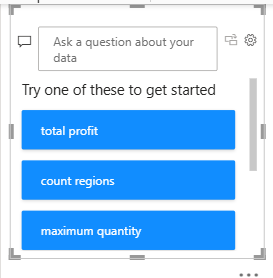

Dari gambar diatas kita hanya perlu memasukkan data yang ingin digunakan, beserta bentuk visualisasi diagramnya. Selanjutnya akan saya buat satu persatu visualisasinya, untuk ditampilkan di dashboard.

### **A. Diagram Donat Penjualan Region**

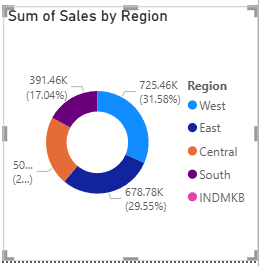

### **B. Diagram Kanal Penjualan Sub-Kategori**

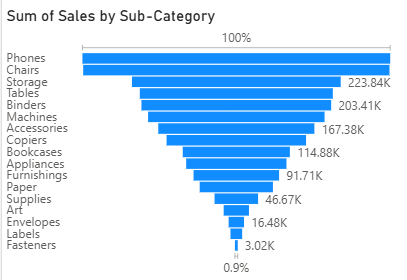

### **C. Diagram Peta Penjualan Negara Bagian**

Untuk Diagram Peta dirubah terlebih dahulu 'Style' yang terdapat di dalam 'Map Settings' menjadi 'Aerial agar lebih menarik.

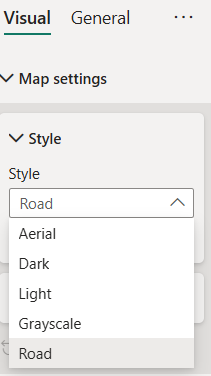

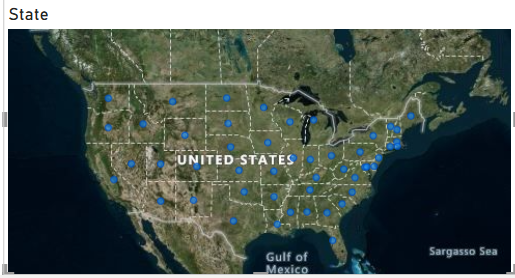

#### **D. Diagram Pie Penjualan Segmen**

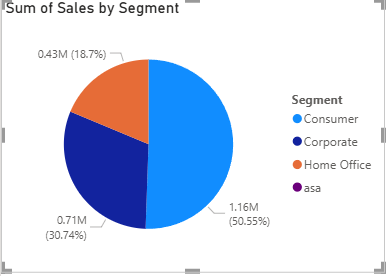

### **E. Diagram Garis Penjualan Tanggal Pemesanan**

Untuk yang order date jika bentuknya belum berupa 'Date', jangan lupa diubah terlebih dahulu kedalam bentuk 'Date'.

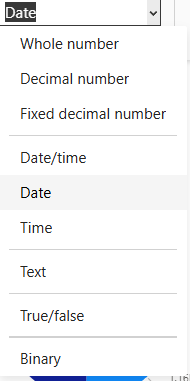

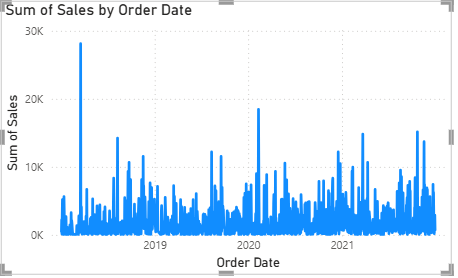

### **F. Jumlah masing-masing Total Diskon, Kunatitas, Penjualan dan Keuntungan**

Untuk keempat data tersebut tidak perlu menunjukkan grafiknya, cukup di tunjukkan angkanya saja. Diubah terlebih dahulu ke dalam bentuk 'Card' (ditandai dalam kotak hiatam). Lalu tarik dari lembar kerja ke dasbor.

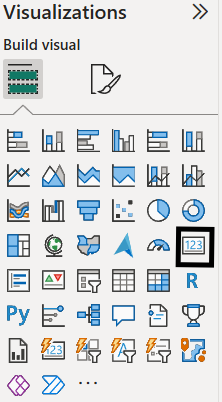

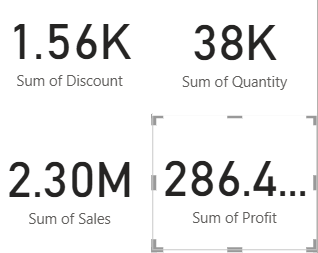

### **G. Memberi Judul**

Untuk pembuatan judul menggunakan fitur teks box.

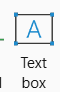

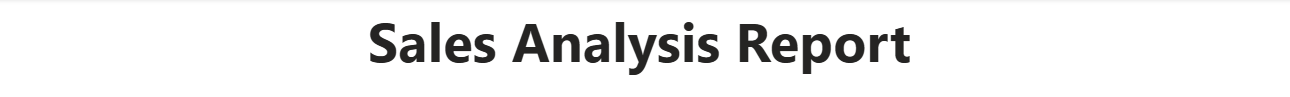

### **H. Memilih Warna Dashbor**

Pemilihan warna ditujukan agar dashbor lebih interaktif dan menarik.

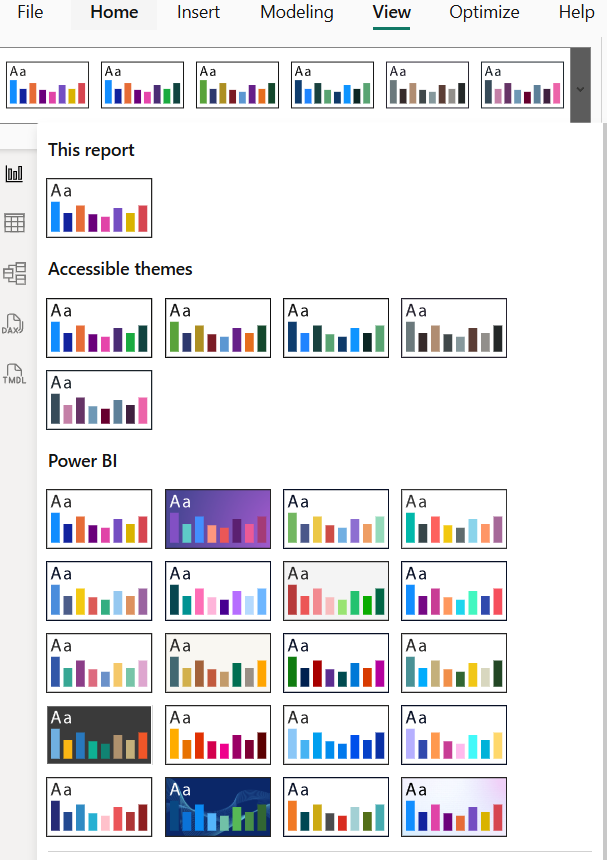

## **9. Hasil Akhir Dashboard**

Berikut merupakan hasil akhir dashboard.

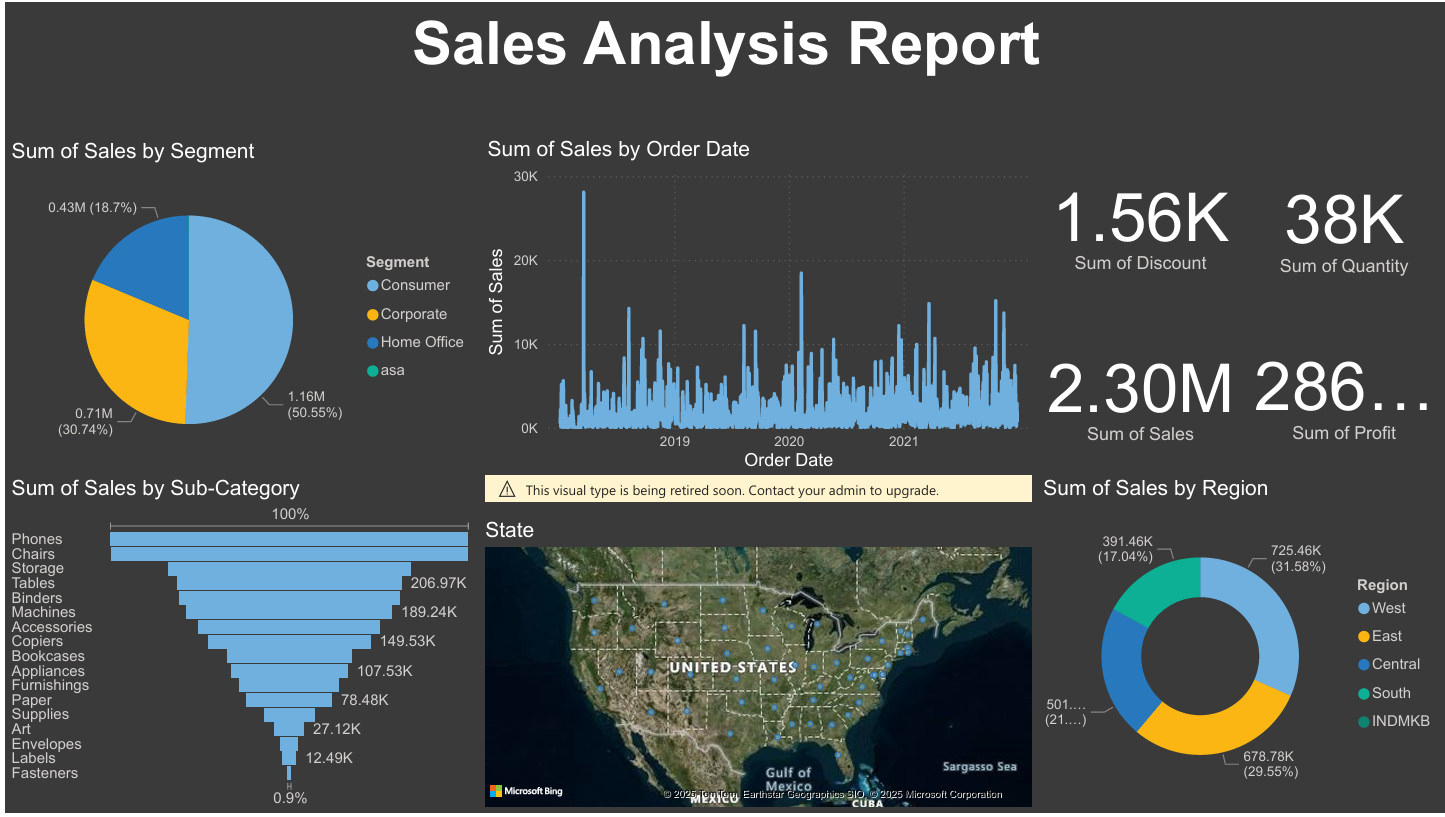